Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dime que pais quieres que te muestre: arg
['CCA3', 'Country/Territory', '2020', '2015', '2010', '2000', '1990', '1980', '1970']


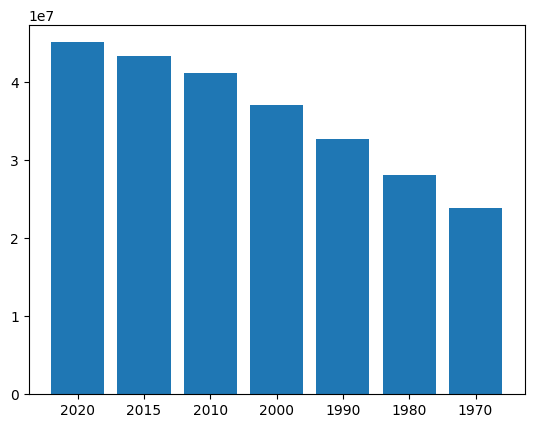

None


In [80]:
from os import replace
from google.colab import drive
import csv
import matplotlib.pyplot as plt

drive.mount('/content/drive')

def read_csv(path, country):
  with open(path, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    header_full = next(reader)
    header = []
    count_h = 1
    while count_h <=12:
      if count_h>=1 and count_h<=2:
        header.append(header_full[count_h])
      if count_h>=6 and count_h<=12:
        header.append(header_full[count_h].replace(" Population",""))
      count_h += 1
    print(header)
    for row in reader:
      my_row = row[1:3]
      my_row.extend(row[6:13])
      my_row_2 = []
      count = 0
      for i in my_row:
        if count == 0 or count == 1:
          my_row_2.append(i)
          count+=1
        else:
          my_row_2.append(int(i))
      if my_row_2[0] == country:
        generate_bar_chart(header[2:],my_row_2[2:])

def generate_bar_chart(labels, values):
  fig, ax = plt.subplots()
  ax.bar(labels, values)
  plt.show()

if __name__ == '__main__':
  pais = input('Dime que pais quieres que te muestre: ').upper()
  data = read_csv('/content/drive/MyDrive/Colab Notebooks/Curso de Python Comprehensions, Funciones y Manejo de Errores/world_population.csv', pais)
  print(data)
